In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport

#Para obtener multiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
basedir = './GlobalTemperatures'

In [4]:
clima = os.path.join(basedir, 'GlobalLandTemperaturesByCity' + '.csv')
dfClima = pd.read_csv(clima)

<AxesSubplot:xlabel='dt'>

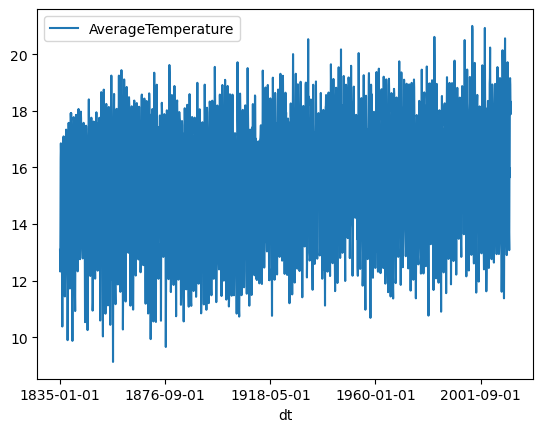

In [79]:
dfTlaquepaque = dfClima[(dfClima.City == 'Mexico')]
dfTlaquepaque[['AverageTemperature', 'dt']].plot(kind='line', x = 'dt', y = 'AverageTemperature')

In [80]:
dfTlaquepaque['Date'] = pd.to_datetime(dfTlaquepaque.dt, format='%Y-%d-%m')
dfTlaquepaque['Year'] = dfTlaquepaque['Date'].dt.year

C:\Users\Rafael\AppData\Local\Temp\ipykernel_6620\2765810150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTlaquepaque['Date'] = pd.to_datetime(dfTlaquepaque.dt, format='%Y-%d-%m')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_6620\2765810150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTlaquepaque['Year'] = dfTlaquepaque['Date'].dt.year


In [81]:
df = dfTlaquepaque.groupby('Year')['AverageTemperature'].mean().reset_index()

<AxesSubplot:xlabel='Year'>

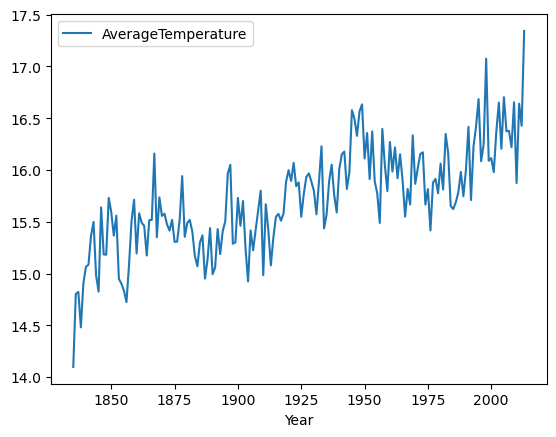

In [82]:
df.plot(x = 'Year',y = 'AverageTemperature')

<Figure size 1800x1000 with 0 Axes>

[Text(0, 0, '1750'),
 Text(50, 0, '1800'),
 Text(100, 0, '1850'),
 Text(150, 0, '1900'),
 Text(200, 0, '1950'),
 Text(250, 0, '2000')]

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Temperature (in °C)')

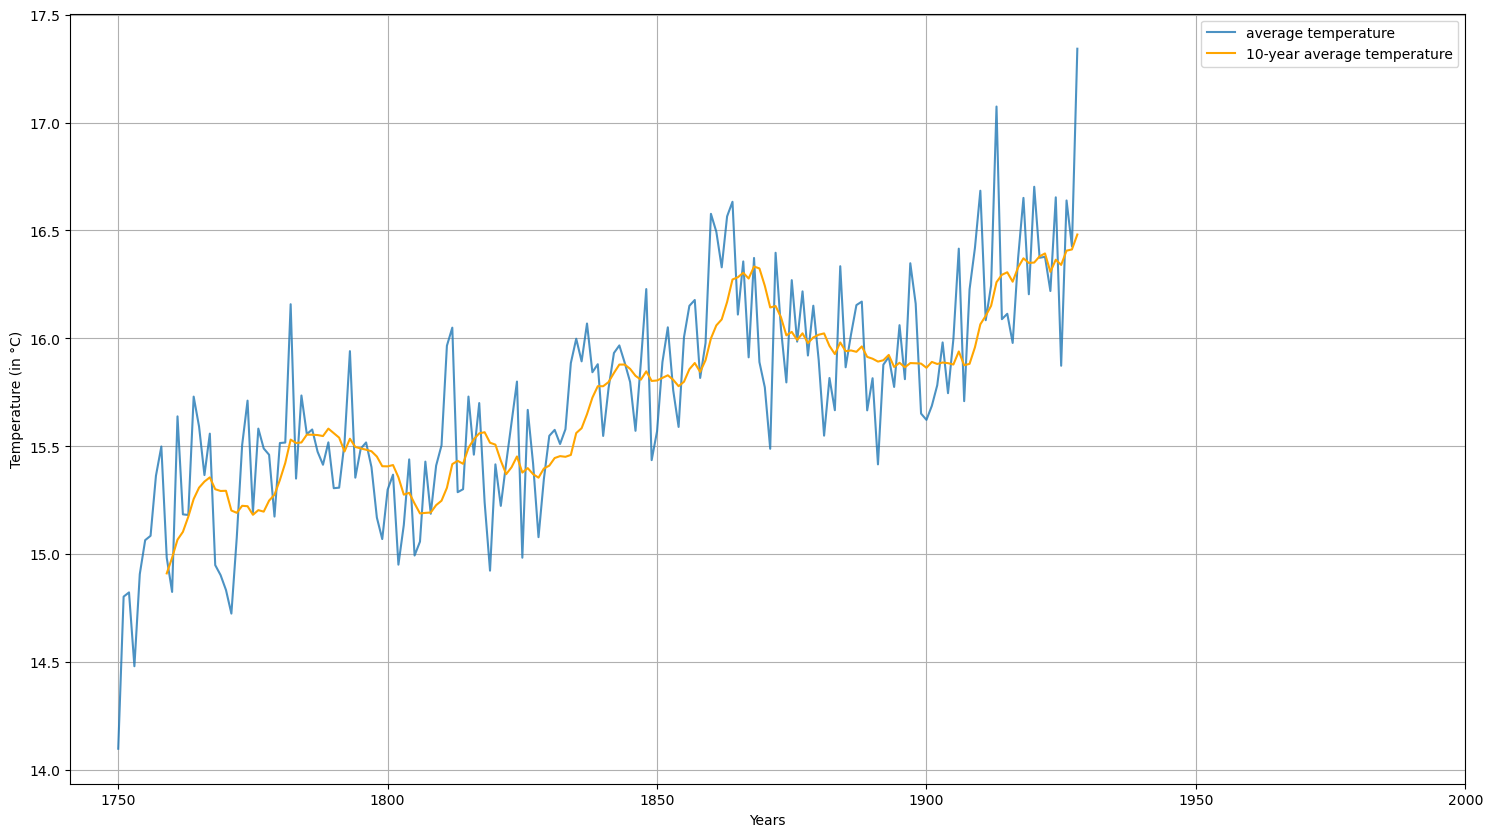

<Figure size 640x480 with 0 Axes>

In [83]:
temperature_px = df['AverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['AverageTemperature'], alpha=0.8, label='average temperature')
ax.plot(df['10'], color="orange", label='10-year average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

<Figure size 1800x1000 with 0 Axes>

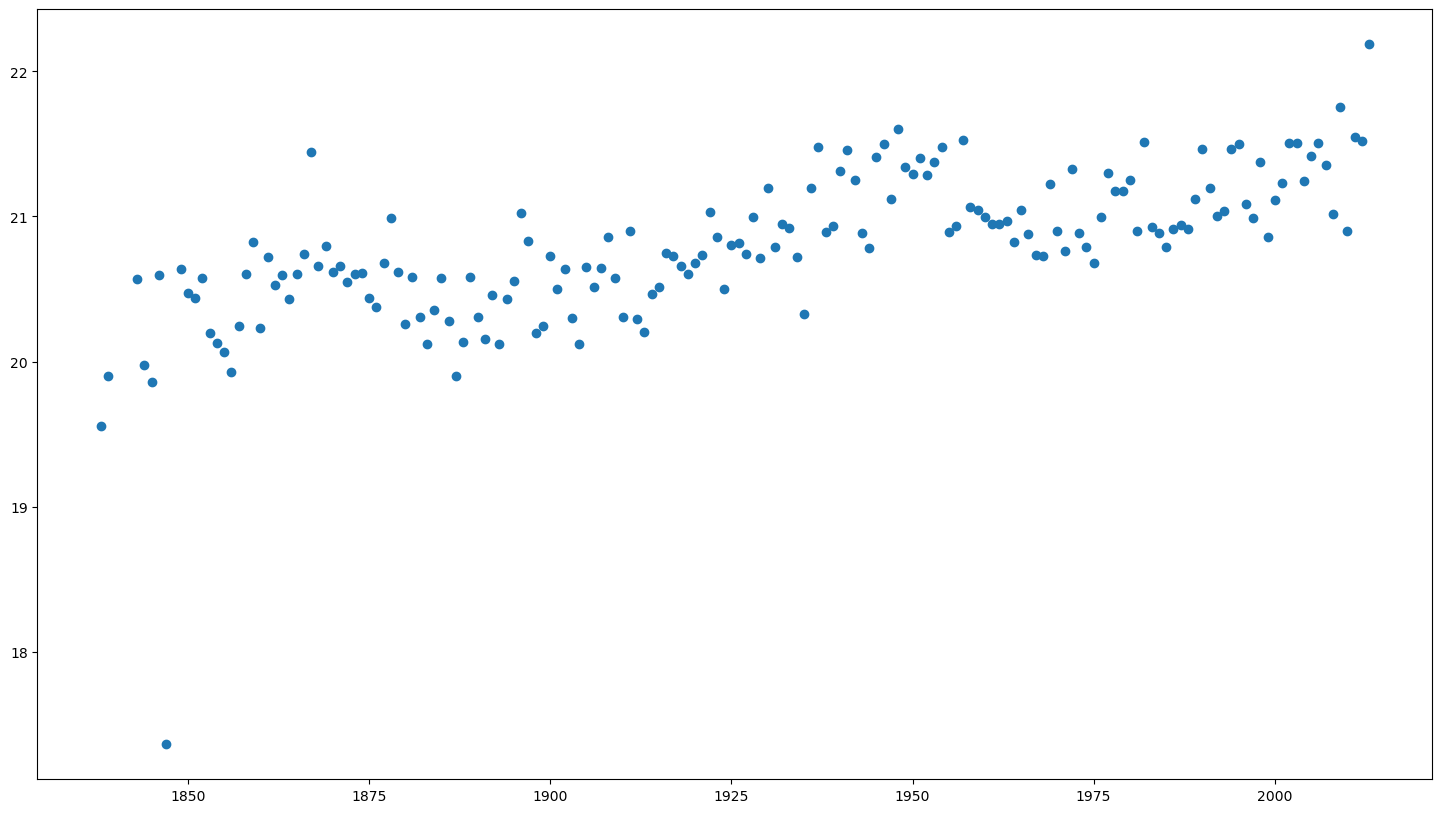

In [50]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'AverageTemperature')
plt.show()

In [5]:
print('GLOBAL')
dfClima.head(1)
dfClima.info()
dfClima.describe()

GLOBAL


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01
